<a href="https://colab.research.google.com/github/fimoziq/unecozik/blob/main/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as dates

In [13]:
from pandas import read_csv
df = read_csv('wfaf12.csv',parse_dates = True, index_col = 0,delimiter=';',decimal=',')
df.head()

,доход
дата,
2007-01-01,17358.12
2007-02-01,17648.75
2007-03-01,17326.13
2007-04-01,17542.83
2007-05-01,17434.01


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   доход   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [15]:
df_columns, df.columns = df.columns, ('y', )
df_index, df.index.name = df.index.name, 'date'
df.head()

,y
date,
2007-01-01,17358.12
2007-02-01,17648.75
2007-03-01,17326.13
2007-04-01,17542.83
2007-05-01,17434.01


In [28]:
df['t']=np.arange(1, len(df)+1)
df.head()

,y,t
2007-01-01,17358.12,1
2007-02-01,17648.75,2
2007-03-01,17326.13,3
2007-04-01,17542.83,4
2007-05-01,17434.01,5


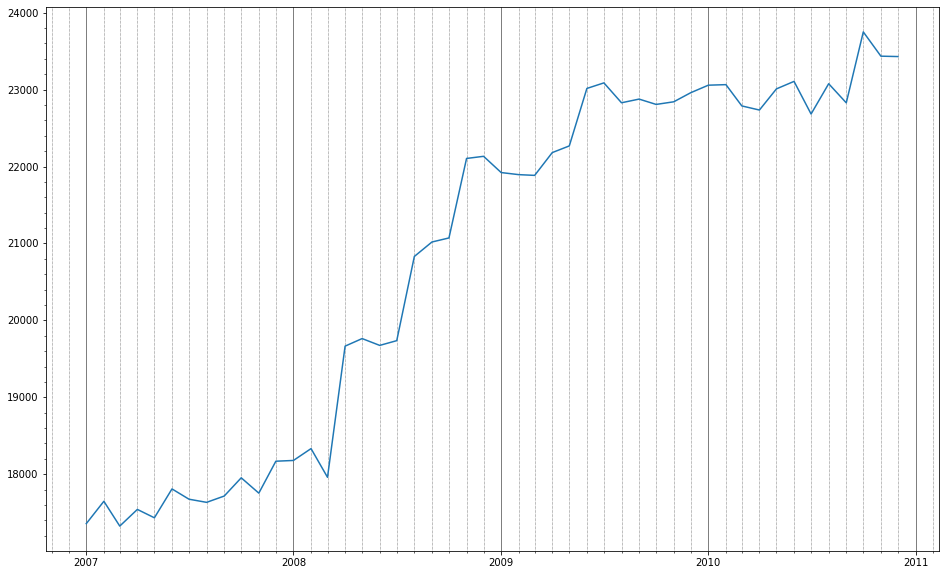

In [16]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df)

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))

ax.minorticks_on()
ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonth = range(1, 13)))

ax.set_axisbelow(True)

plt.show()

In [17]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [20]:
arr = df['y']
df.index = pd.DatetimeIndex(df.index.values, freq='MS')
print(df.index)

DatetimeIndex(['2007-01-01', '2007-02-01', '2007-03-01', '2007-04-01',
               '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01',
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01',
               '2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01',
               '2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01'],
              dtype='datetime64[ns]', freq='MS')


In [21]:
def RSME(ts1, ts2):
    return np.sqrt(np.sum(np.power(ts1 - ts2, 2)) / len(ts1))

In [22]:
model = SimpleExpSmoothing(df['y']).fit()
forecast = model.forecast(12)

In [23]:
model.params_formatted

,name,param,optimized
smoothing_level,alpha,0.876831,True
initial_level,l.0,17389.399963,True


l0=17389,4 // Начальный уровень подбирается исходя из минимизации оcтатков и не имеет особой интерпритации

*a*=0,8768 // близко к единице - больший вес имеют последние наблюдения


In [24]:
RSME(model.fittedvalues, arr)

414.307968256162

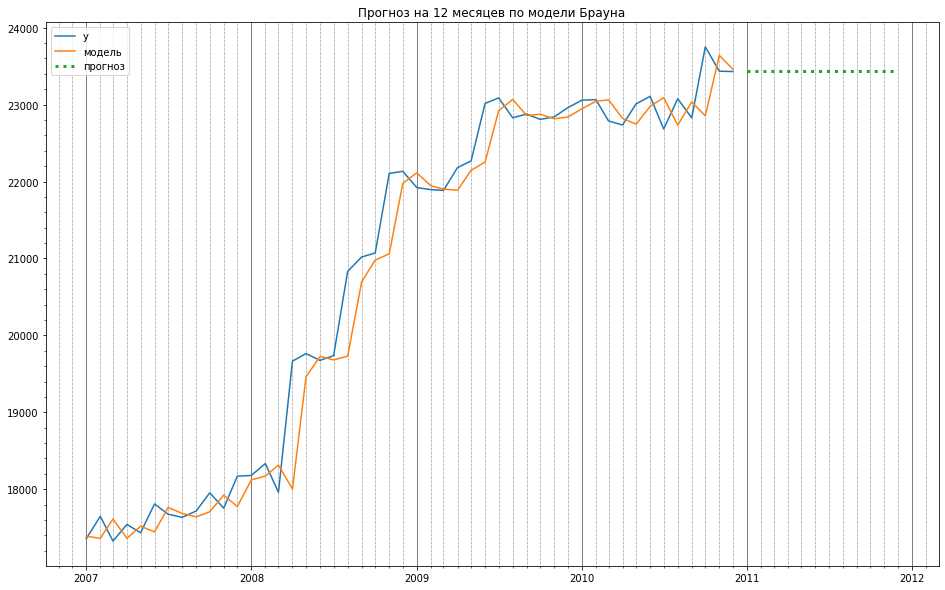

In [26]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df['y'], label = 'y')

ax.plot(model.fittedvalues, label = 'модель')

ax.plot(forecast, label = 'прогноз', linestyle = ':', linewidth = '3')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))

ax.minorticks_on()
ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonth = range(1, 13)))

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели Брауна')

plt.show()